In [13]:

import pathlib


path=str(pathlib.Path().resolve())+"/nombres_dinosaurios.txt"
path

'C:\\Users\\diego.guizanlopez\\Documents\\BigDataEIa\\IA\\Modelo_IA\\2º_Trimestre\\Tokenizacion\\Dinosaurios10-01/nombres_dinosaurios.txt'

In [14]:
#Sacamos toda la combinación posible de caracteres
text=open(path).read().lower().replace('\n','.')
text

'aachenosaurus.aardonyx.abdallahsaurus.abelisaurus.abrictosaurus.abrosaurus.abydosaurus.acanthopholis.achelousaurus.acheroraptor.achillesaurus.achillobator.acristavus.acrocanthosaurus.acrotholus.actiosaurus.adamantisaurus.adasaurus.adelolophus.adeopapposaurus.aegyptosaurus.aeolosaurus.aepisaurus.aepyornithomimus.aerosteon.aetonyxafromimus.afrovenator.agathaumas.aggiosaurus.agilisaurus.agnosphitys.agrosaurus.agujaceratops.agustinia.ahshislepelta.airakoraptor.ajancingenia.ajkaceratops.alamosaurus.alaskacephale.albalophosaurus.albertaceratops.albertadromeus.albertavenator.albertonykus.albertosaurus.albinykus.albisaurus.alcovasaurus.alectrosaurus.aletopelta.algoasaurus.alioramus.aliwalia.allosaurus.almas.alnashetri.alocodon.altirhinus.altispinax.alvarezsaurus.alwalkeria.alxasaurus.amargasaurus.amargastegos.amargatitanis.amazonsaurus.ammosaurus.ampelosaurus.amphicoelias.amphicoelicaudia.amphisaurus.amtocephale.amtosaurus.amurosaurus.amygdalodon.anabisetia.anasazisaurus.anatosaurus.anatotita

In [15]:
vocabulario=sorted(list(set(text)))
len_datos, len_vocabulario = len(text),len(vocabulario)

In [16]:
#Creamos un mapa para cada uno de los diferentes valores
stoi = {ch:i for i,ch in enumerate(vocabulario)}
itos = {i:ch for i,ch in enumerate(vocabulario)}
print(stoi)
print(itos)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [20]:
#Creamos en NumPy una tabla con los valores
from pprint import pprint
import numpy as np


N = np.zeros((len_vocabulario,len_vocabulario),dtype=np.int32)
#for i in range(len_vocabulario):
#    for j in range(len_vocabulario):
#        bigrama = itos[i] + itos[j]
#        N[i,j] = text.count(bigrama)
        
for i in range(len_datos-1):
    bigrama = text[i] + text[i+1]
    fila = stoi[text[i]]
    col = stoi[text[i+1]]
    N[fila,col] += 1


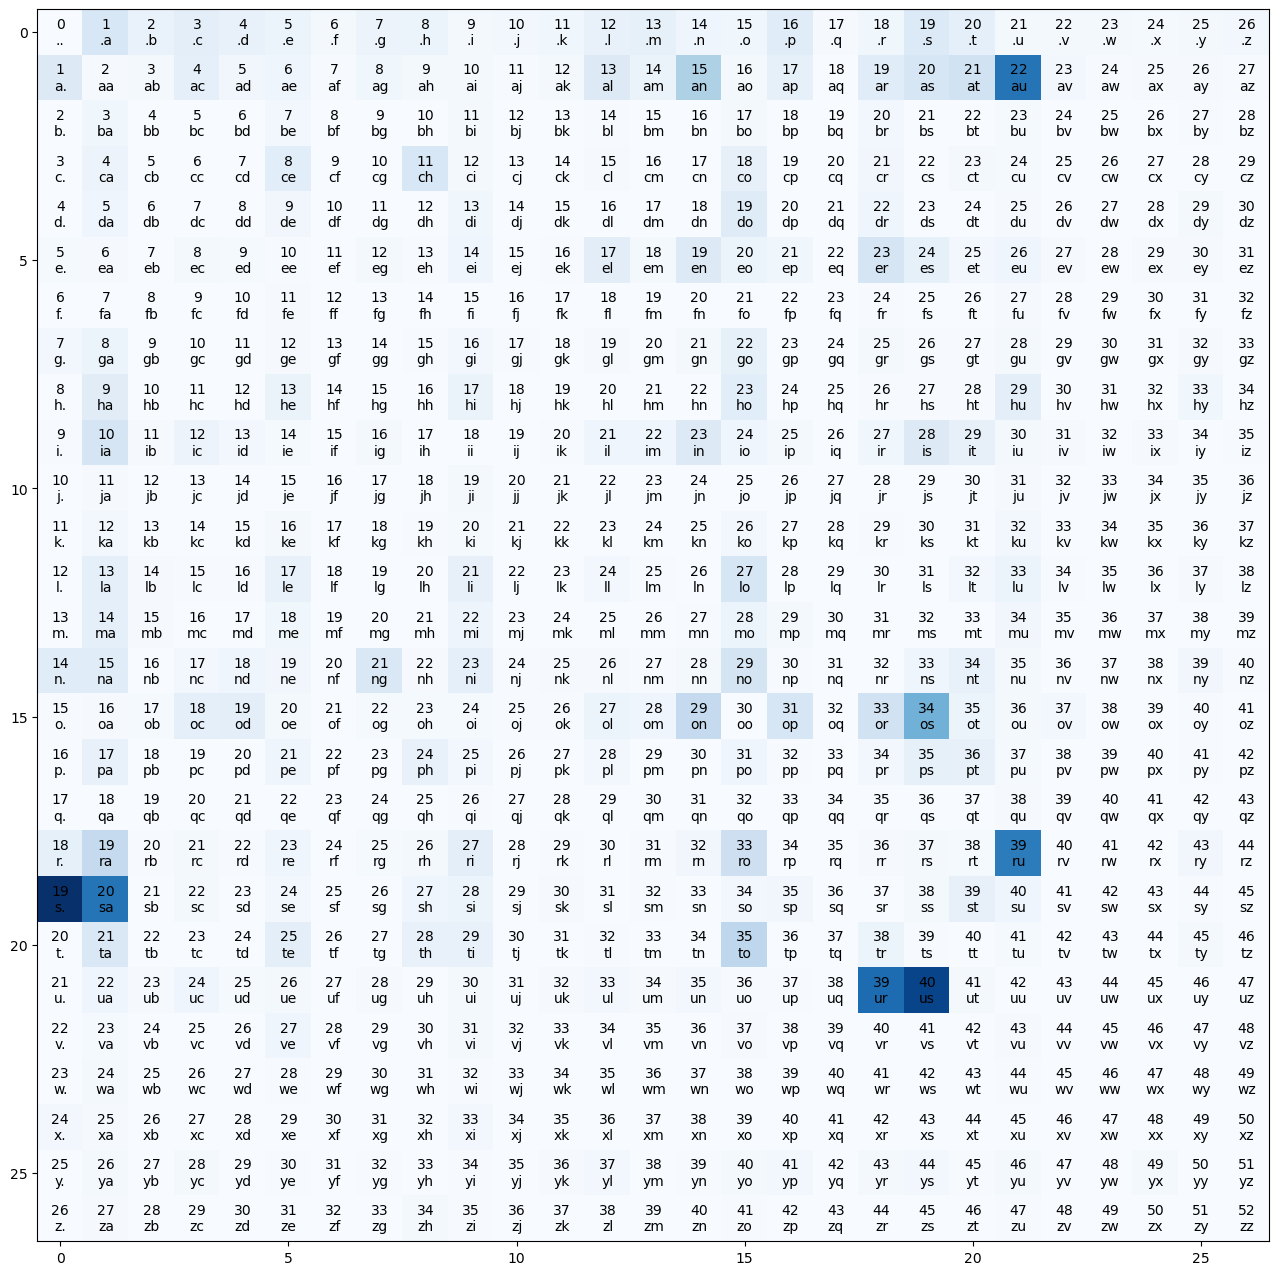

In [30]:
from matplotlib import pyplot as plt

#Combinación de letras y veces que aparecen

plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues",)

for i in range(len_vocabulario):
    for j in range(len_vocabulario):
        bigrama = itos[i] + itos[j]
        plt.text(j,i,str(i+j)+"\n"+bigrama,ha="center",va="center")
        

In [67]:
#Probabilidad de cada elemento
N[0]/N[0].sum()

array([0.        , 0.10749186, 0.04885993, 0.07100977, 0.05276873,
       0.04234528, 0.01368078, 0.03973941, 0.04169381, 0.01563518,
       0.01693811, 0.02605863, 0.0534202 , 0.05928339, 0.03127036,
       0.0267101 , 0.08143322, 0.00651466, 0.02605863, 0.09511401,
       0.06449511, 0.01172638, 0.01368078, 0.01107492, 0.01042345,
       0.01563518, 0.01693811])

In [112]:
#Probabilidad de cada combinación
import time

#Menos óptimo
#A=time.time()*1000000
P = list(map(lambda x : N[x]/N[x].sum(),range(N.__len__())))
#print(time.time()*1000000-A)

4995.75


In [113]:
#A=time.time()*1000000
P = N.astype(float)/N.sum(axis=1,keepdims=True)
#print(time.time()*1000000-A)

0.0


In [ ]:
import random

# Genera con las probabilidades valores de combinaciones de dinosaurios
z=P[0]
print(z)
random.choices(range(27),weights=z,k=5)

In [233]:
for i in range(10):
    salida=[]
    ix=stoi["."]
    while True:
        z=P[ix]
        ix=random.choices(range(27),weights=z,k=1)[0]
        salida.append(itos[ix])
        if ix==0:
            break
    print("".join(salida))    

pnichurasasastironosaorurusacurorusaurusacos.
pavilour.
dorus.
husan.
aotaurimarops.
es.
sauryiahotenatiateros.
ruegtcendrtorus.
saus.
n.
